In [ ]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
 df=pd.read_csv('/content/drive/MyDrive/thesis/ok.csv')

In [ ]:
df['date']=pd.to_datetime(df['date'])
df.head

<bound method NDFrame.head of           date   Temp
0   2007-01-01  21.10
1   2007-02-01  23.15
2   2007-03-01  29.45
3   2007-04-01  32.75
4   2007-05-01  33.85
..         ...    ...
127 2017-08-01  31.85
128 2017-09-01  31.75
129 2017-10-01  31.30
130 2017-11-01  27.00
131 2017-12-01  25.35

[132 rows x 2 columns]>

In [ ]:
df.set_index('date',inplace=True)
df.head

<bound method NDFrame.head of              Temp
date             
2007-01-01  21.10
2007-02-01  23.15
2007-03-01  29.45
2007-04-01  32.75
2007-05-01  33.85
...           ...
2017-08-01  31.85
2017-09-01  31.75
2017-10-01  31.30
2017-11-01  27.00
2017-12-01  25.35

[132 rows x 1 columns]>

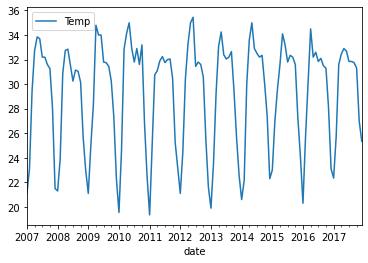

In [ ]:
df.plot()

In [ ]:
df['Seasonal First Difference']=df['Temp']-df['Temp'].shift(12)


In [ ]:
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Seasonal First Difference'].dropna())


ADF Test Statistic : -5.752540639250787
p-value : 5.920661677293831e-07
#Lags Used : 11
Number of Observations Used : 108
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


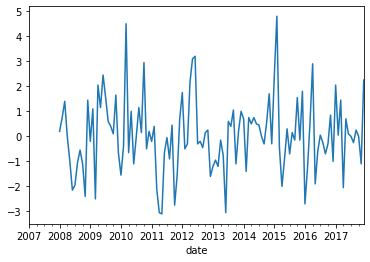

In [ ]:
df['Seasonal First Difference'].plot()


In [ ]:
import statsmodels.api as sm

m=[]
p = range(0, 3)
d = range(1,2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['Seasonal First Difference'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            m.append(results.aic)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
pdq

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.841757
         Iterations: 2
         Function evaluations: 46
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:752.2239174862549


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Optimization terminated successfully.
         Current function value: 2.515565
         Iterations: 5
         Function evaluations: 148
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:668.1091189802219


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.379583
         Iterations: 6
         Function evaluations: 222
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:634.209855587187


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.583134
         Iterations: 2
         Function evaluations: 50
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:685.9472700118966
Optimization terminated successfully.
         Current function value: 2.407544
         Iterations: 4
         Function evaluations: 162
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:641.591581700926


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.379799
         Iterations: 8
         Function evaluations: 406
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:636.2669932602569


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.488180
         Iterations: 2
         Function evaluations: 75
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:662.879599060688


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.391989
         Iterations: 8
         Function evaluations: 409
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:639.485169482284


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.397648
         Iterations: 4
         Function evaluations: 260
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:642.9791715300979


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.649800
         Iterations: 2
         Function evaluations: 62
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:703.5472773185077
Optimization terminated successfully.
         Current function value: 2.330306
         Iterations: 5
         Function evaluations: 251
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:621.200677947139


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.213754
         Iterations: 6
         Function evaluations: 318
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:592.4309610074563


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.412842
         Iterations: 3
         Function evaluations: 123
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:642.990332185958


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.230899
         Iterations: 5
         Function evaluations: 253
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:596.9573052330571


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.211780
         Iterations: 6
         Function evaluations: 434
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:593.909831149817


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.291397
         Iterations: 4
         Function evaluations: 229
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:612.9286830044105


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.211558
         Iterations: 7
         Function evaluations: 449
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:593.8513759761563


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.215908
         Iterations: 6
         Function evaluations: 452
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:596.9995988135869
Optimization terminated successfully.
         Current function value: 2.639461
         Iterations: 2
         Function evaluations: 84
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:702.8178316507109


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.321031
         Iterations: 5
         Function evaluations: 325
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:620.7521025035522


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.202922
         Iterations: 6
         Function evaluations: 413
ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:591.571319656616


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.398281
         Iterations: 3
         Function evaluations: 160
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:641.1460555258301


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.220566
         Iterations: 5
         Function evaluations: 352
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:596.2295327116207


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.200933
         Iterations: 7
         Function evaluations: 564
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:593.0462534122828


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.284145
         Iterations: 4
         Function evaluations: 279
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:613.01415954309


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.203291
         Iterations: 7
         Function evaluations: 512
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:593.6689514511744


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.208446
         Iterations: 6
         Function evaluations: 573
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:597.0297813907393


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.637463
         Iterations: 3
         Function evaluations: 199
ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:704.2902594990113


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.317807
         Iterations: 5
         Function evaluations: 359
ARIMA(0, 1, 3)x(0, 1, 1, 12)12 - AIC:621.9010080000007


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.198592
         Iterations: 5
         Function evaluations: 412
ARIMA(0, 1, 3)x(0, 1, 2, 12)12 - AIC:592.4283873560875


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.393101
         Iterations: 3
         Function evaluations: 214
ARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:641.7786971483373


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.216744
         Iterations: 5
         Function evaluations: 404
ARIMA(0, 1, 3)x(1, 1, 1, 12)12 - AIC:597.2204209824301


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.196800
         Iterations: 7
         Function evaluations: 629
ARIMA(0, 1, 3)x(1, 1, 2, 12)12 - AIC:593.9552257571289


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.282599
         Iterations: 4
         Function evaluations: 320
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:614.6062325322868


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.201248
         Iterations: 7
         Function evaluations: 641
ARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:595.1294284506497


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.205686
         Iterations: 6
         Function evaluations: 638
ARIMA(0, 1, 3)x(2, 1, 2, 12)12 - AIC:598.3011329686908
Optimization terminated successfully.
         Current function value: 2.763824
         Iterations: 1
         Function evaluations: 25
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:733.6495763749183


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.430169
         Iterations: 4
         Function evaluations: 154
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:647.5646515398539


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.295816
         Iterations: 6
         Function evaluations: 303
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:614.0955364234612


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.506330
         Iterations: 3
         Function evaluations: 121
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:667.6712178391232


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.321848
         Iterations: 4
         Function evaluations: 207
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:620.9679313331055


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.295439
         Iterations: 8
         Function evaluations: 509
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:615.9959509149917


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.398800
         Iterations: 4
         Function evaluations: 203
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:641.2831824740824


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.304522
         Iterations: 7
         Function evaluations: 452
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:618.3938045471018


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.294231
         Iterations: 14
         Function evaluations: 1049
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:617.676930568591


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.638583
         Iterations: 3
         Function evaluations: 143
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:702.5858718378599


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.319755
         Iterations: 5
         Function evaluations: 310
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:620.4154156689887


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.201117
         Iterations: 5
         Function evaluations: 354
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:591.0948490083792


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.395991
         Iterations: 4
         Function evaluations: 241
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:640.5416811098061


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.218514
         Iterations: 5
         Function evaluations: 359
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:595.6877477371642


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.199046
         Iterations: 7
         Function evaluations: 566
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:592.5481750057801


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.283373
         Iterations: 4
         Function evaluations: 268
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:612.8104167070585


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.201781
         Iterations: 7
         Function evaluations: 519
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:593.2702723690392


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.206427
         Iterations: 6
         Function evaluations: 559
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:596.4967612907892


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.648025
         Iterations: 4
         Function evaluations: 212
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:707.0786998309419


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.330814
         Iterations: 4
         Function evaluations: 295
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:625.3348251620594


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.212927
         Iterations: 6
         Function evaluations: 449
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:596.2126933157135


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.411888
         Iterations: 5
         Function evaluations: 362
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:646.738449886202


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.230657
         Iterations: 6
         Function evaluations: 458
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:600.8933405680581


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.210521
         Iterations: 7
         Function evaluations: 615
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:597.5774992787357


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.291216
         Iterations: 6
         Function evaluations: 458
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:616.881134802091


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.200659
         Iterations: 12
         Function evaluations: 1118
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:594.9740280773094


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.216773
         Iterations: 5
         Function evaluations: 502
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:601.2279842888372


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.623875
         Iterations: 4
         Function evaluations: 249
ARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:702.7030644995519


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.300804
         Iterations: 5
         Function evaluations: 418
ARIMA(1, 1, 3)x(0, 1, 1, 12)12 - AIC:619.4123778247991


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.185412
         Iterations: 6
         Function evaluations: 551
ARIMA(1, 1, 3)x(0, 1, 2, 12)12 - AIC:590.9488746734347


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.370353
         Iterations: 5
         Function evaluations: 373
ARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:637.7732363370303


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.201075
         Iterations: 6
         Function evaluations: 526
ARIMA(1, 1, 3)x(1, 1, 1, 12)12 - AIC:595.0837632108487


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.183493
         Iterations: 8
         Function evaluations: 828
ARIMA(1, 1, 3)x(1, 1, 2, 12)12 - AIC:592.4420549009649


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.270900
         Iterations: 5
         Function evaluations: 432
ARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:613.5176301649542


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.187447
         Iterations: 9
         Function evaluations: 898
ARIMA(1, 1, 3)x(2, 1, 1, 12)12 - AIC:593.4859623822839


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.191277
         Iterations: 7
         Function evaluations: 780
ARIMA(1, 1, 3)x(2, 1, 2, 12)12 - AIC:596.4970813498119
Optimization terminated successfully.
         Current function value: 2.742861
         Iterations: 1
         Function evaluations: 37
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:730.1152435009177


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.412078
         Iterations: 4
         Function evaluations: 204
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:644.7886737615906


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.277777
         Iterations: 6
         Function evaluations: 371
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:611.3330161622189


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.489428
         Iterations: 3
         Function evaluations: 155
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:665.2089204175007


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.301794
         Iterations: 4
         Function evaluations: 257
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:617.6736253248196


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.277021
         Iterations: 7
         Function evaluations: 521
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:613.1335973938427


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.371428
         Iterations: 4
         Function evaluations: 248
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:636.0568932242708


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.282963
         Iterations: 7
         Function evaluations: 539
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:614.7023057320517


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.289273
         Iterations: 5
         Function evaluations: 438
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:618.3680464526308


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 2.638750
         Iterations: 9
         Function evaluations: 454
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:704.6299853351824


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.319228
         Iterations: 9
         Function evaluations: 587
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:622.276168867714


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.199560
         Iterations: 7
         Function evaluations: 568
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:592.6838057379475


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.395706
         Iterations: 9
         Function evaluations: 565
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:642.4663690208104


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.217584
         Iterations: 7
         Function evaluations: 524
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:597.442242201724


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.198304
         Iterations: 7
         Function evaluations: 606
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:594.3522109400005


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.282877
         Iterations: 6
         Function evaluations: 471
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:614.6796138400778


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.200672
         Iterations: 8
         Function evaluations: 707
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:594.977335381723


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.205518
         Iterations: 7
         Function evaluations: 695
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:598.2568357004681


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.634435
         Iterations: 3
         Function evaluations: 225
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:705.4907706780518


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.312341
         Iterations: 5
         Function evaluations: 409
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:622.4579047340375


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.192525
         Iterations: 5
         Function evaluations: 469
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:592.8265912967528


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.386554
         Iterations: 4
         Function evaluations: 340
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:642.0502103015649


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.209392
         Iterations: 5
         Function evaluations: 483
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:597.2794378669774


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.190157
         Iterations: 7
         Function evaluations: 760
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:594.2013439631958


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.276656
         Iterations: 4
         Function evaluations: 347
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:615.0372663487019


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.193371
         Iterations: 8
         Function evaluations: 852
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:595.0498681594559


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.197970
         Iterations: 6
         Function evaluations: 696
ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:598.2639748343856


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.560419
         Iterations: 6
         Function evaluations: 493
ARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:687.9505513400252


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.280649
         Iterations: 11
         Function evaluations: 961
ARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:616.0912201152483


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.183186
         Iterations: 6
         Function evaluations: 602
ARIMA(2, 1, 3)x(0, 1, 2, 12)12 - AIC:592.3611867119204


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.349457
         Iterations: 9
         Function evaluations: 800
ARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:634.2567533970451


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.192001
         Iterations: 9
         Function evaluations: 886
ARIMA(2, 1, 3)x(1, 1, 1, 12)12 - AIC:594.6881370971943


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.177512
         Iterations: 9
         Function evaluations: 995
ARIMA(2, 1, 3)x(1, 1, 2, 12)12 - AIC:592.8630665543827


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.255252
         Iterations: 6
         Function evaluations: 609
ARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:611.3864107253806


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.180839
         Iterations: 7
         Function evaluations: 775
ARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:593.7414586387661


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 2.182544
         Iterations: 7
         Function evaluations: 865
ARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:596.1915367381822


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3)]

In [ ]:
min(m)

590.9488746734347

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Temp'],order=(1, 1, 3),seasonal_order=(0,1,2,12))
results=model.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [ ]:
df

,Temp,Seasonal First Difference
date,,
2007-01-01,21.10,NaN
2007-02-01,23.15,NaN
2007-03-01,29.45,NaN
2007-04-01,32.75,NaN
2007-05-01,33.85,NaN
...,...,...
2017-08-01,31.85,-0.25
2017-09-01,31.75,0.25
2017-10-01,31.30,0.00


In [ ]:
import numpy as np
#df['forecast']=results.predict(start=13,end=24,dynamic=True)
#df['forecast']=results.predict(start=25,end=36,dynamic=True)
#df['forecast']=results.predict(start=118,end=130,dynamic=True)
zero=[np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN]
first=np.array(results.predict(start=13,end=23,dynamic=True))
las=np.append(zero,first)
las1=np.append(las,np.array(results.predict(start=24,end=35,dynamic=True)))
thi=np.append(las1,np.array(results.predict(start=36,end=47,dynamic=True)))
four=np.append(thi,np.array(results.predict(start=48,end=59,dynamic=True)))
five=np.append(four,np.array(results.predict(start=60,end=71,dynamic=True)))
six=np.append(five,np.array(results.predict(start=72,end=83,dynamic=True)))
seve=np.append(six,np.array(results.predict(start=84,end=95,dynamic=True)))
eig=np.append(seve,np.array(results.predict(start=96,end=107,dynamic=True)))
nine=np.append(eig,np.array(results.predict(start=108,end=119,dynamic=True)))
ten=np.append(nine,np.array(results.predict(start=120,end=131,dynamic=True)))


#df[['temp','forecast']].plot(figsize=(12,8))
ten
#df['forecast']=pd.DataFrame(ten)

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan, 23.35003162, 29.65002375,
       32.95003628, 34.05002874, 33.90003478, 32.40003539, 32.40003353,
       31.80003597, 31.45002633, 28.25002907, 21.70002206, 20.86315567,
       23.23279177, 29.22485326, 32.2673174 , 32.64606032, 32.12612692,
       30.61081524, 31.10236207, 30.68517511, 30.11666665, 26.27838451,
       21.50371092, 21.45648678, 24.03589082, 29.83842399, 33.44093287,
       33.680599  , 33.11676922, 31.5224672 , 31.813745  , 31.51794731,
       30.67796632, 27.13974312, 22.34397191, 20.90198171, 24.92729519,
       30.60836669, 34.23487927, 34.34556468, 33.63828322, 32.03016147,
       32.48912059, 31.99140201, 31.57817907, 27.56506123, 22.92621829,
       20.85108139, 24.67621842, 30.31795669, 33.50090948, 33.6607732 ,
       33.05903968, 31.5938324 , 32.08901419, 31.59693383, 31.16

In [ ]:
df['forecast']=ten
df

,Temp,Seasonal First Difference,forecast
date,,,
2007-01-01,21.10,NaN,NaN
2007-02-01,23.15,NaN,NaN
2007-03-01,29.45,NaN,NaN
2007-04-01,32.75,NaN,NaN
2007-05-01,33.85,NaN,NaN
...,...,...,...
2017-08-01,31.85,-0.25,32.301046
2017-09-01,31.75,0.25,32.096665
2017-10-01,31.30,0.00,31.026196


132

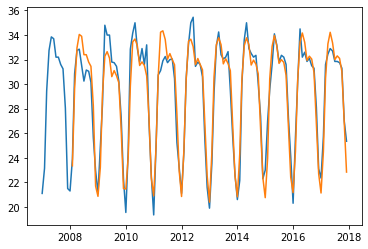

In [ ]:

plt.plot(df['Temp'])
plt.plot(df['forecast'])
len(df['forecast'])
#plt.xlim('2012-01-10, 2012-02-30')

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,Temp
2019-07-01,NaN
2019-08-01,NaN
2019-09-01,NaN
2019-10-01,NaN
2019-11-01,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])


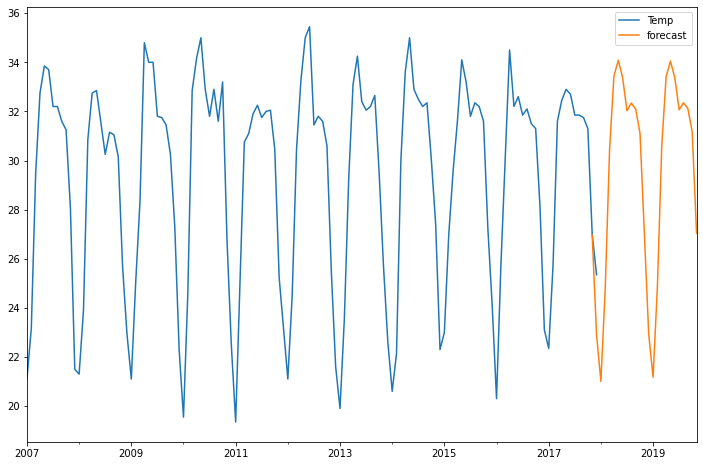

In [ ]:
future_df['forecast'] = results.predict(start = 130, end = 154, dynamic= True)
future_df[['Temp', 'forecast']].plot(figsize=(12, 8))

In [ ]:
forecast=df['forecast']
forecast=forecast[-119:]
actual=df['Temp']
actual=actual[-119:]

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast, actual)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g

{'corr': 0.9608237846167703,
 'mae': 0.91990648869386,
 'mape': 0.032235895924131674,
 'me': -0.03804076994420242,
 'minmax': 0.031383077900277834,
 'mpe': -0.0006043339824990551,
 'rmse': 1.1968321629689223}

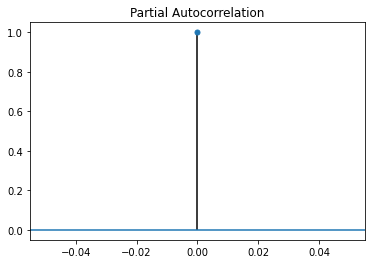

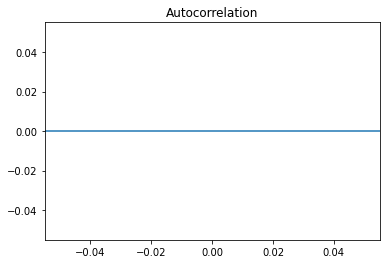

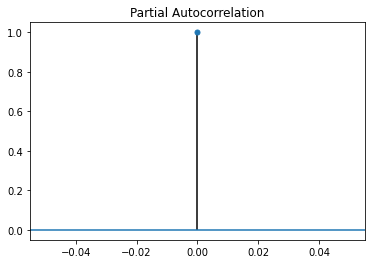

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(ten, lags=26)
sm.graphics.tsa.plot_pacf(ten, lags=26)
